In [4]:
# Importing all the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import sys
import os
from IPython.display import display
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install plotly

In [6]:
# Importing the data files
emp_data = pd.read_excel('C:/Users/GANESHA/Downloads/project/Data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [7]:
emp_data.shape

(1200, 28)

Checking Data Staistics

In [8]:
emp_data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


Almost 19% of the people are not satisfied with their job or satisfaction is low


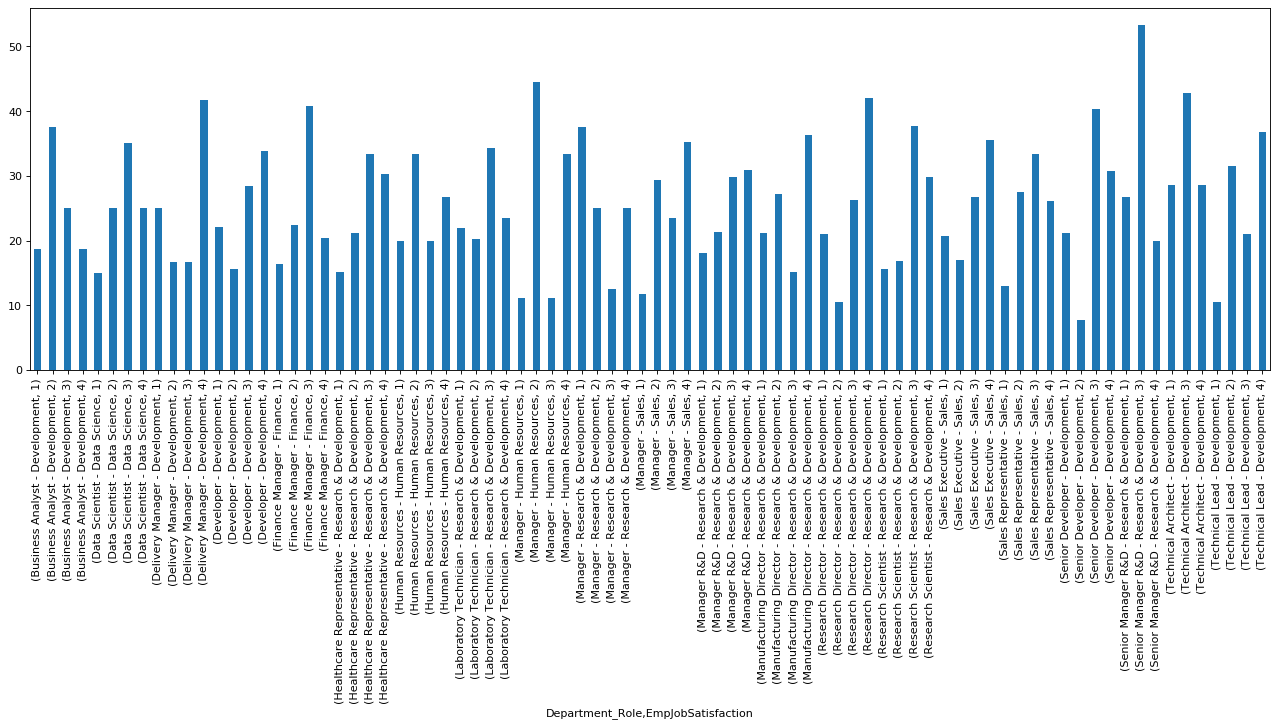

In [9]:
# Combining Role with Department
emp_data['Department_Role'] = emp_data['EmpJobRole'] + " - " + emp_data['EmpDepartment']

In [11]:
emp_data_columns = emp_data.columns.values
print(emp_data_columns)

['EmpNumber' 'Age' 'Gender' 'EducationBackground' 'MaritalStatus'
 'EmpDepartment' 'EmpJobRole' 'BusinessTravelFrequency' 'DistanceFromHome'
 'EmpEducationLevel' 'EmpEnvironmentSatisfaction' 'EmpHourlyRate'
 'EmpJobInvolvement' 'EmpJobLevel' 'EmpJobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'EmpLastSalaryHikePercent'
 'EmpRelationshipSatisfaction' 'TotalWorkExperienceInYears'
 'TrainingTimesLastYear' 'EmpWorkLifeBalance'
 'ExperienceYearsAtThisCompany' 'ExperienceYearsInCurrentRole'
 'YearsSinceLastPromotion' 'YearsWithCurrManager' 'Attrition'
 'PerformanceRating' 'Department_Role']


In [12]:
X = emp_data[emp_data_columns[0:29]]
Y = emp_data['PerformanceRating']

In [13]:
X.drop('PerformanceRating', axis=1, inplace=True)
X.drop('EmpNumber', axis=1, inplace = True)

In [14]:
X.head(1)
X.shape

(1200, 27)

In [15]:
X_Gender = pd.get_dummies(X['Gender'], drop_first = False , sparse = True)
X_Education = pd.get_dummies(X['EducationBackground'], drop_first = False , sparse = True)
X_MaritalStatus = pd.get_dummies(X['MaritalStatus'], drop_first = False , sparse = True)
X_EmpDepartment = pd.get_dummies(X['EmpDepartment'], drop_first = False , sparse = True)
X_EmpJobRole = pd.get_dummies(X['EmpJobRole'], drop_first = False , sparse = True)
X_BusinessTravelFrequency = pd.get_dummies(X['BusinessTravelFrequency'], drop_first = False , sparse = True)
X_OverTime = pd.get_dummies(X['OverTime'], drop_first = False, sparse = True)
X_Department_Role = pd.get_dummies(X['Department_Role'], drop_first = False , sparse = True)
X_Attrition = pd.get_dummies(X['Attrition'], drop_first = False, sparse = True)

In [16]:
X['Gender'] = X_Gender
X['EducationBackground'] = X_Education
X['MaritalStatus'] = X_MaritalStatus
X['EmpDepartment'] = X_EmpDepartment
X['EmpJobRole'] = X_EmpJobRole
X['BusinessTravelFrequency'] = X_BusinessTravelFrequency
X['OverTime'] = X_OverTime
X['Department_Role'] = X_Department_Role
X['Attrition'] = X_Attrition
X.shape

(1200, 27)

In [17]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department_Role
0,32,0,0,0,0,0,0,10,3,4,...,4,10,2,2,10,7,0,8,1,0
1,47,0,0,0,0,0,0,14,4,4,...,4,20,2,3,7,7,1,7,1,0
2,40,0,0,0,0,0,0,5,4,4,...,3,20,2,3,18,13,1,12,1,0
3,41,0,1,1,0,0,0,10,4,2,...,2,23,2,2,21,6,12,6,1,0
4,60,0,0,0,0,0,0,16,4,1,...,4,10,1,3,2,2,2,2,1,0


In [18]:
Y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64